## Assignment 6 - Deadline: Dec 9, 2024, Mon 11pm

#### DSAI 510 Fall 2024

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.boun.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [1]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the display option to show all rows scrolling with a slider
pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if they ask "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Problem 1: Modeling heart disease dataset with different binary classifiers (50 pts)

Here's the heart disease dataset info:<br>

Age: age of the patient [years] <br>
Sex: sex of the patient [M: Male, F: Female]<br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br>
Cholesterol: serum cholesterol [mm/dl]<br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal]<br>

**TASKS to be done:**

Note: Read all of the tasks first to get an idea of the process before you begin completing them.
We'll train binary classifiers to predict the target HeartDisease, which can be 0 or 1.
1) Clean the dataset (handle duplicate records, missing values etc. if any)
2) Do EDA: Create the pairplots ( we've done it before) by using `sns` package and also create the colored correlation matrix that shows correlation value between the features. Make each cell include the correlation value and color it according to that value (we've done it before).
3) Split the dataset as train, validation and test.
4) Standardize (mean=0, std=1) all numerical columns (not categorical ones!). To do this, we will learn the transformation parameters (mean and std) from the train data, then use these two parameters to transform train, validation and test datasets. Notice that we're not using the whole dataset's (train+val+test) mean and std values to standardize. This would create what's called "data leakage". You'd want to avoid using some info from val and test dataset to transform the train dataset. No information should leak to our training process from the val and test datasets as val and test datasets are considered unknown during the training phase. You can read more about this from here: https://towardsdatascience.com/the-dreaded-antagonist-data-leakage-in-machine-learning-5f08679852cc . 

The correct scaling idea is shown below--but remember, you should standardize only the numerical columns, not the categorical ones or their one-hot encoded versions. So you need to substitute "columns" in the code below with positions of the numerical columns, e.g., columns = [0, 2, 4].

```
columns = [?, ?, ...]
sc = StandardScaler()
sc.fit(X_train[:, columns])  # Learn mean and std from only train set.
X_train[:, columns] = sc.transform(X_train[:, columns])
X_val[:, columns] = sc.transform(X_val[:, columns])
X_test[:, columns] = sc.transform(X_test[:, columns])
```
5) Now apply on training data (i) logistic regression, (ii) k-NN, (iii) linear SVM, (iv) kernel SVM, (v) naive Bayes, (vi) decision tree (single tree), (vii) random forest, (viii) gradient boosted trees and (ix) xgboost as binary classifiers (try to tune hyperparameters to avoid underfitting and overfitting to get the best out of each model). Calculate accuracy, sensitivity (recall), specificity, precision and F1 scores for each model on the validation set. Display your results in a summary table each row will include the model name and associated evaluation metrics (performance metrics) from the validation set.

6) Show the ROC curves for each model on the same plot (except SVM models) by indicating which curve belongs to which model by using a legend (preferably, color coded). Interpret the ROC curves. Which one is the best?

7) Now you will choose the best model among the ones you used in the previous step. For each model, some performance metrics may be high but some may be low. So, you need to decide on a performance metric based on your aim before looking at these metrics' values. **Your aim here is to identify everyone with even a slight possibility of having a heart attack, as heart attacks are often fatal.** Which performance metric is the most suitable for this problem among accuracy, sensitivity (recall), specificity, precision, F1 score and ROC? There may not be a single answer; choose the one that you think is the most suitable. Explain why you choose that particular metric? Warning: Here we are deciding on the metric based on our aim mentioned above; we're not choosing a metric that has maximum value!

8) Now find among the trained models that has the maximum value of the performance metric, which you chose in the previous step.

9) Now you've chosen your best predictive model, calculate its performance metric, which you chose previously, on the test dataset. You can announce to the world this test metric as your best model's predictive power.





In [2]:
# Read the dataset
heart = pd.read_csv(r"C:\Users\seval\OneDrive\Desktop\BOUN2024\DSAI510\HW6\DSAI510 Assignment 06_16d116a1b813e5d79cbd12ada42cfb3f (1)\heart.csv")

# Explore the original data before cleaning
def explore_dataset(heart):
    print("\nInitial Data Exploration:")
    print("-" * 50)
    
    # Display first few rows
    print("\n1. First 5 rows of the dataset:")
    print(heart.head())
    
    # Basic dataset information
    print("\n2. Dataset Shape:")
    print(f"Number of rows: {heart.shape[0]}")
    print(f"Number of columns: {heart.shape[1]}")
    
    # Check target variable
    print("\nTarget Variable Class Balance:")
    print(heart['HeartDisease'].value_counts())
    
    # Duplicate rows
    duplicates = heart.duplicated().sum()
    print(f"\n4. Number of duplicate rows: {duplicates}")
    if duplicates > 0:
        print("\nFirst few duplicate rows:")
        print(heart[heart.duplicated(keep='first')].head())
    
    # Missing values
    print("\n5. Missing Values Count:")
    missing_values = heart.isnull().sum()
    if missing_values.any():
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found in the dataset")
    
    # Feature information
    print("\n6. Feature Information:")
    print("\nFeature Types:")
    print(heart.dtypes)
    
    # Basic statistics for numeric columns
    print("\n7. Numeric Features Statistics:")
    print(heart.describe())
    
# Perform initial data exploration
explore_dataset(heart)



Initial Data Exploration:
--------------------------------------------------

1. First 5 rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

2. Dataset Shape:
Number of rows: 918
Number of columns: 12

Target Variable Class Balance:
Hea

In [ ]:
# here we see that we have 11 features, 1 target value and classes are more or less balanced (55% to 45%)
# no duplicated row, no missing value
# not all columns are numerical, which needs to be handled
# some outliers can be, we will check after standardization



In [18]:
# Part 1
def clean_heart_disease_data(heart):
    """
    Basic cleaning of the heart disease dataset:
    1. Although no duplicate or missing value, contains such operations 
    to make this code more applicable to other datasets later
    2. Convert categorical variables to numeric using pd.factorize
    """
    # Create a copy to avoid modifying the original dataframe
    data = heart.copy()
    
    # Check for duplicate records
    n_duplicates = data.duplicated().sum()
    if n_duplicates > 0:
        data = data.drop_duplicates()
        print(f"Removed {n_duplicates} duplicate records")
    
    # Check for missing values
    missing_values = data.isnull().sum()
    if missing_values.any():
        print("\nColumns with missing values:")
        print(missing_values[missing_values > 0])
        
        # For numeric columns, fill with median
        numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            if data[col].isnull().any():
                data[col].fillna(data[col].median(), inplace=True)
        
        # For categorical columns, fill with mode
        categorical_cols = data.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if data[col].isnull().any():
                data[col].fillna(data[col].mode()[0], inplace=True)
    
    return data

def print_data_summary(heart_original, heart_cleaned):
    """
    Print a summary of the cleaning process
    """
    print("\nData Cleaning Summary:")
    print("-" * 50)
    print(f"Original dataset shape: {heart_original.shape}")
    print(f"Cleaned dataset shape: {heart_cleaned.shape}")
    print(f"Records removed: {len(heart_original) - len(heart_cleaned)}")
    print("\nFeature types after cleaning:")
    print(heart_cleaned.dtypes)
    print("\nFeature statistics after cleaning:")
    print(heart_cleaned.describe())

# Clean the data
print("\nProceeding with data cleaning...")
cleaned_data = clean_heart_disease_data(heart)

# Print summary of cleaning
print_data_summary(heart, cleaned_data)


Proceeding with data cleaning...

Data Cleaning Summary:
--------------------------------------------------
Original dataset shape: (918, 12)
Cleaned dataset shape: (918, 12)
Records removed: 0

Feature types after cleaning:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Feature statistics after cleaning:
          Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  \
count 918.000    918.000      918.000    918.000 918.000  918.000   
mean   53.511    132.397      198.800      0.233 136.809    0.887   
std     9.433     18.514      109.384      0.423  25.460    1.067   
min    28.000      0.000        0.000      0.000  60.000   -2.600   
25%    47.000    120.000      173.250      0.000 120.000    0.000  

In [19]:
# Part 2
def encode_data(heart):
    """
    Encode categorical variables appropriately for EDA visualizations.
    
    Encodings:
    1. Sex (Binary): F->0, M->1
    2. ChestPainType (Nominal): One-hot encoded (4 new columns)
    3. RestingECG (Nominal): One-hot encoded (3 new columns)
    4. ExerciseAngina (Binary): N->0, Y->1
    5. ST_Slope (Ordinal): Down->0, Flat->1, Up->2
    """
    # Create a copy to avoid modifying the original dataframe
    data = heart.copy()
    
    # 1. Binary encoding for Sex
    data['Sex'] = data['Sex'].map({'F': 0, 'M': 1})
    
    # 2 & 3. One-hot encoding for nominal variables
    # This will create separate columns for each category
    nominal_columns = ['ChestPainType', 'RestingECG']
    data = pd.get_dummies(data, 
                         columns=nominal_columns,
                         prefix=['ChestPain', 'ECG'])
    
    # 4. Binary encoding for ExerciseAngina
    data['ExerciseAngina'] = data['ExerciseAngina'].map({'N': 0, 'Y': 1})
    
    # 5. Ordinal encoding for ST_Slope
    data['ST_Slope'] = data['ST_Slope'].map({'Down': 0, 'Flat': 1, 'Up': 2})
    
    # Print summary of encodings
    print("\nEncoding Summary:")
    print("-" * 50)
    print("\n1. Binary Variables:")
    print("Sex: F -> 0, M -> 1")
    print("ExerciseAngina: N -> 0, Y -> 1")
    
    print("\n2. Nominal Variables (One-hot encoded):")
    print("ChestPainType (4 categories):")
    chest_pain_cols = [col for col in data.columns if 'ChestPain_' in col]
    print(f"Created columns: {chest_pain_cols}")
    
    print("\nRestingECG (3 categories):")
    ecg_cols = [col for col in data.columns if 'ECG_' in col]
    print(f"Created columns: {ecg_cols}")
    
    print("\n3. Ordinal Variables:")
    print("ST_Slope: Down -> 0, Flat -> 1, Up -> 2")
    
    print("\nFinal column names:")
    print(data.columns.tolist())
    
    return data

heart_encoded = encode_data(cleaned_data)


Encoding Summary:
--------------------------------------------------

1. Binary Variables:
Sex: F -> 0, M -> 1
ExerciseAngina: N -> 0, Y -> 1

2. Nominal Variables (One-hot encoded):
ChestPainType (4 categories):
Created columns: ['ChestPain_ASY', 'ChestPain_ATA', 'ChestPain_NAP', 'ChestPain_TA']

RestingECG (3 categories):
Created columns: ['ECG_LVH', 'ECG_Normal', 'ECG_ST']

3. Ordinal Variables:
ST_Slope: Down -> 0, Flat -> 1, Up -> 2

Final column names:
['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease', 'ChestPain_ASY', 'ChestPain_ATA', 'ChestPain_NAP', 'ChestPain_TA', 'ECG_LVH', 'ECG_Normal', 'ECG_ST']


<Figure size 2500x2500 with 0 Axes>

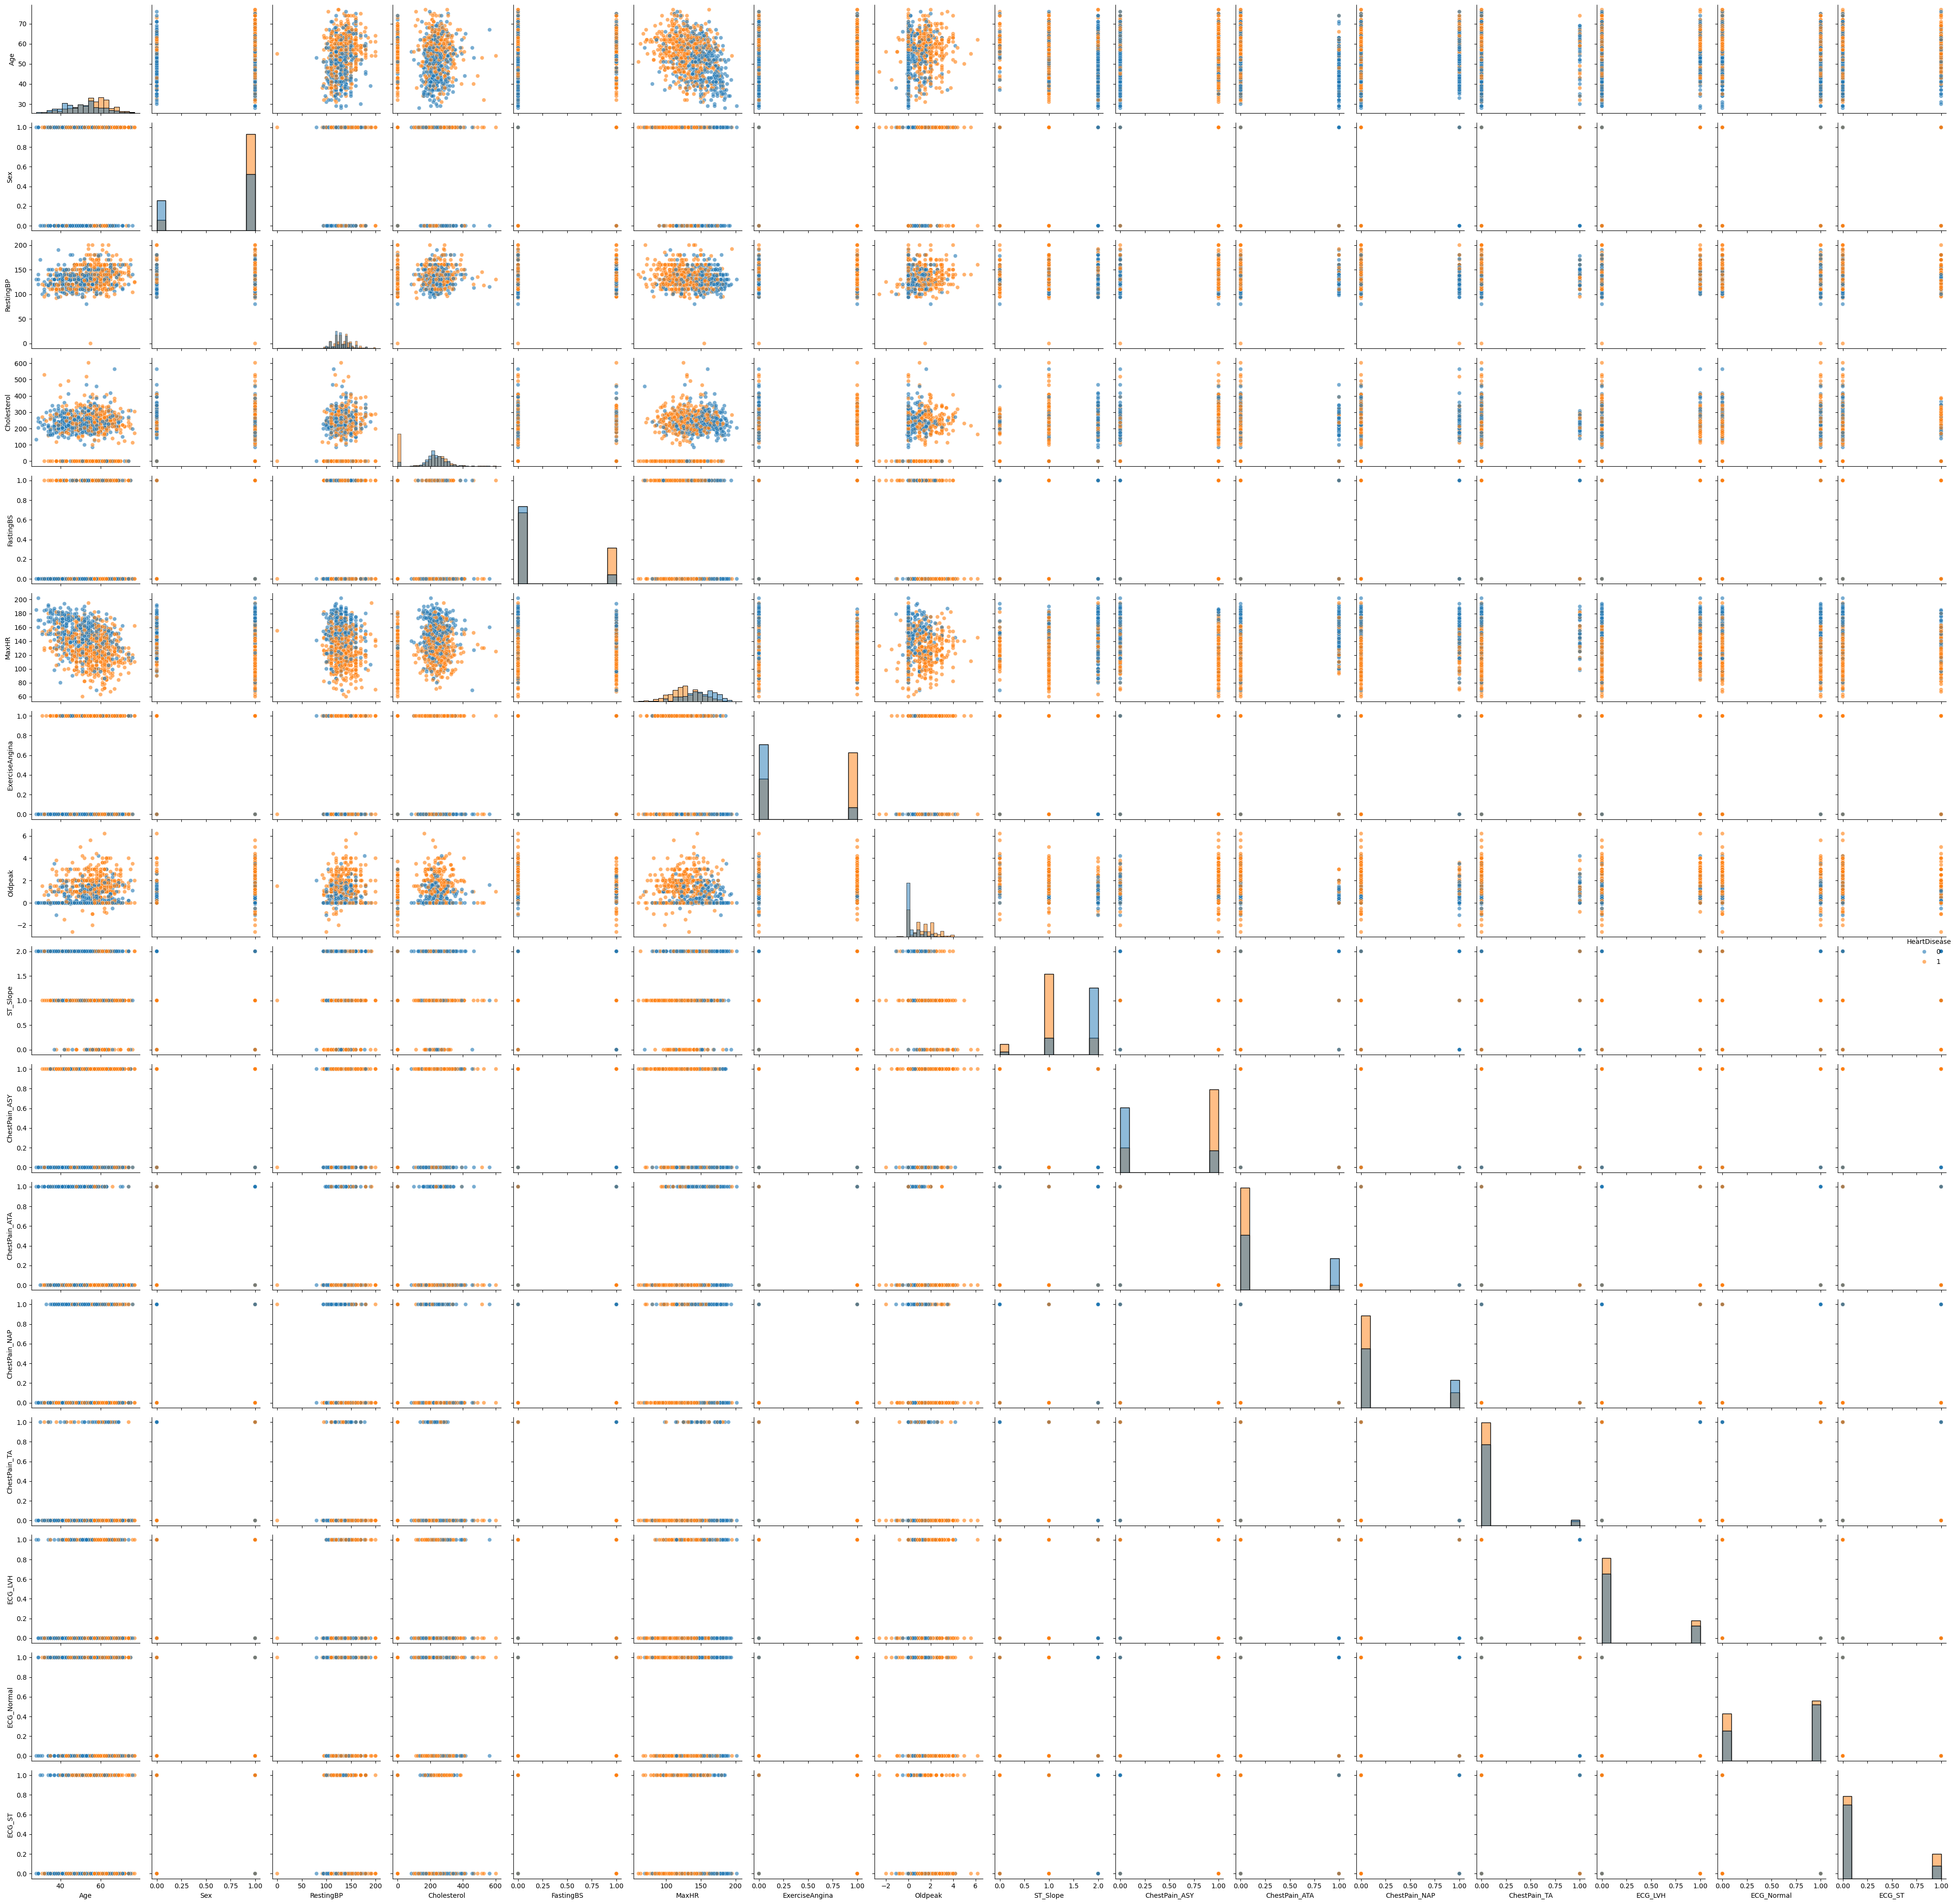

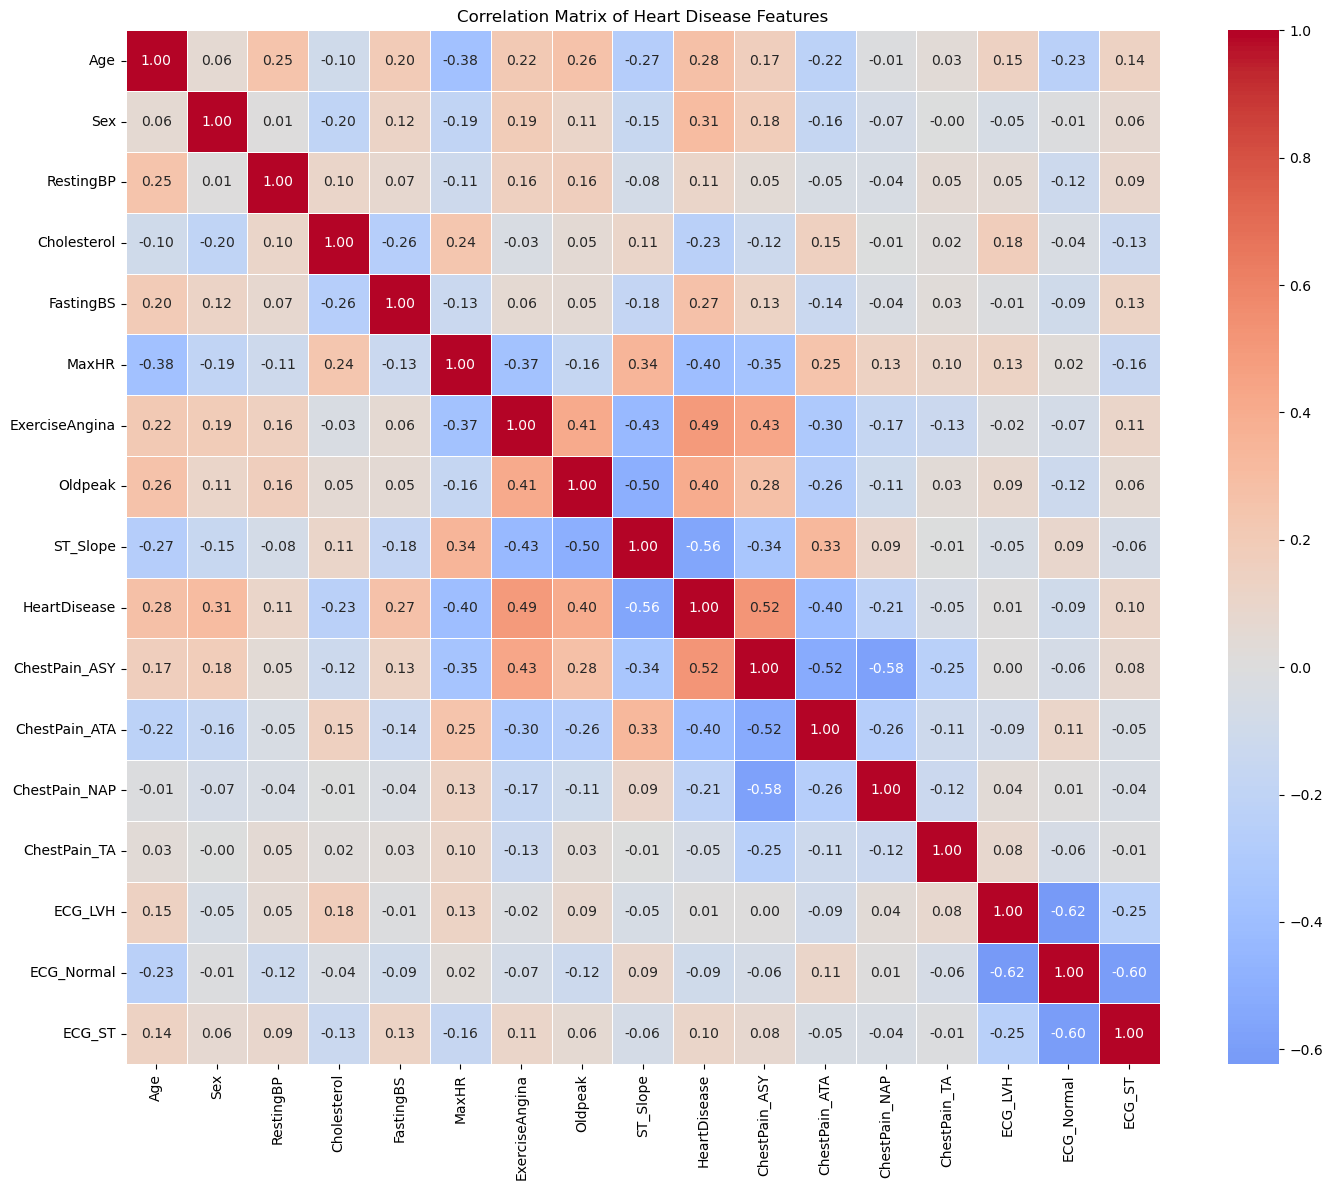


Strongest Feature Correlations with Heart Disease:
HeartDisease      1.000000
ChestPain_ASY     0.516716
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
ECG_ST            0.102527
ECG_LVH           0.010670
ChestPain_TA     -0.054790
ECG_Normal       -0.091580
ChestPain_NAP    -0.212964
Cholesterol      -0.232741
MaxHR            -0.400421
ChestPain_ATA    -0.401924
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

Correlations by Feature Groups:

Numeric Features vs Heart Disease:
Age            0.282039
RestingBP      0.107589
Cholesterol   -0.232741
MaxHR         -0.400421
Oldpeak        0.403951
Name: HeartDisease, dtype: float64

Binary Features vs Heart Disease:
Sex               0.305445
ExerciseAngina    0.494282
Name: HeartDisease, dtype: float64

One-hot Encoded Features vs Heart Disease:
ChestPain_ASY    0.516716
ChestPain_ATA   -0.401924
ChestPain_

In [10]:
# Create pairplot with ALL features
plt.figure(figsize=(25, 25))  # Larger figure size to accommodate all features
sns.pairplot(heart_encoded, 
             hue='HeartDisease',
             diag_kind='hist',
             plot_kws={'alpha': 0.6})
plt.tight_layout()
plt.show()

# Create correlation matrix
plt.figure(figsize=(15, 12))

# Calculate correlation matrix
corr_matrix = heart_encoded.corr()

# Create heatmap with correlation values
sns.heatmap(corr_matrix,
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format correlation values to 2 decimal places
            square=True,  # Make cells square
            linewidths=0.5)  # Add lines between cells

plt.title('Correlation Matrix of Heart Disease Features')
plt.tight_layout()
plt.show()

# Print the strongest correlations with Heart Disease
print("\nStrongest Feature Correlations with Heart Disease:")
heart_disease_corr = corr_matrix['HeartDisease'].sort_values(ascending=False)
print(heart_disease_corr)

# Print correlations by feature groups
print("\nCorrelations by Feature Groups:")
# Original numeric features
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
print("\nNumeric Features vs Heart Disease:")
print(heart_disease_corr[numeric_features])

# Binary encoded features
binary_features = ['Sex', 'ExerciseAngina']
print("\nBinary Features vs Heart Disease:")
print(heart_disease_corr[binary_features])

# One-hot encoded features (ChestPainType and RestingECG)
onehot_features = [col for col in heart_encoded.columns if 'ChestPain_' in col or 'ECG_' in col]
print("\nOne-hot Encoded Features vs Heart Disease:")
print(heart_disease_corr[onehot_features])

# Ordinal feature (ST_Slope)
print("\nOrdinal Feature vs Heart Disease:")
print(heart_disease_corr['ST_Slope'])

In [ ]:
# ChestPain_ASY (0.517) and ExerciseAngina (0.494) are the strongest positive predictors of target value (heart disease)
# ST segment slope (-0.559), atypical angina (ChestPain_ATA = -0.402), and maximum heart rate (MaxHR = -0.400) show strong negative correlations vs tgt
# Binary and one-hot encoded categorical features generally show stronger correlations than raw numeric features, suggesting the importance of proper feature encoding.
# ECG-related features show weak correlations (all < 0.11), indicating they might be less important for prediction compared to other features.

In [20]:
# Part 3
# Get total size and calculate split sizes
total_size = len(heart_encoded)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

# Create indices and shuffle them
np.random.seed(42)  # for reproducibility
indices = np.random.permutation(total_size)

# Split indices by the ratio decided (0.7, 0.15, 0.15)
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

# Create the splits
train = heart_encoded.iloc[train_indices]
val = heart_encoded.iloc[val_indices]
test = heart_encoded.iloc[test_indices]

# Print split information
print("Dataset Split Information:")
print("-" * 50)
print(f"Total dataset size: {total_size}")
print(f"\nSplit sizes:")
print(f"Training set:   {len(train)} samples ({len(train)/total_size:.1%})")
print(f"Validation set: {len(val)} samples ({len(val)/total_size:.1%})")
print(f"Test set:       {len(test)} samples ({len(test)/total_size:.1%})")

print("\nClass distribution in each split:")
print("\nTraining set:")
print(train['HeartDisease'].value_counts(normalize=True))
print(f"Training set class counts: {train['HeartDisease'].value_counts().to_dict()}")

print("\nValidation set:")
print(val['HeartDisease'].value_counts(normalize=True))
print(f"Validation set class counts: {val['HeartDisease'].value_counts().to_dict()}")

print("\nTest set:")
print(test['HeartDisease'].value_counts(normalize=True))
print(f"Test set class counts: {test['HeartDisease'].value_counts().to_dict()}")

# save splits
train.to_csv('heart_train.csv', index=False)
val.to_csv('heart_val.csv', index=False)
test.to_csv('heart_test.csv', index=False)

Dataset Split Information:
--------------------------------------------------
Total dataset size: 918

Split sizes:
Training set:   642 samples (69.9%)
Validation set: 137 samples (14.9%)
Test set:       139 samples (15.1%)

Class distribution in each split:

Training set:
HeartDisease
1   0.570
0   0.430
Name: proportion, dtype: float64
Training set class counts: {1: 366, 0: 276}

Validation set:
HeartDisease
1   0.540
0   0.460
Name: proportion, dtype: float64
Validation set class counts: {1: 74, 0: 63}

Test set:
HeartDisease
0   0.511
1   0.489
Name: proportion, dtype: float64
Test set class counts: {0: 71, 1: 68}


In [ ]:
# Based on this classes are more or less balanced for positive and negative class
# Each split has enough samples of each class

In [21]:
# Part 4
"""
Feature types after cleaning (outputs of first analysis):
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object """

# Identify original numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS','MaxHR', 'Oldpeak' ]

# Create our own standardization function to avoid using StandardScaler
def fit_standardizer(data, columns):
    """
    Calculate mean and std from training data
    """
    means = data[columns].mean()
    stds = data[columns].std()
    return means, stds

def transform_data(data, columns, means, stds):
    """
    Transform data using pre-computed means and stds
    """
    data_transformed = data.copy()
    data_transformed[columns] = (data_transformed[columns] - means) / stds
    return data_transformed

# Learn parameters from training data only
means, stds = fit_standardizer(train, numerical_columns)

# Transform all datasets using parameters learned from training data
train_scaled = transform_data(train, numerical_columns, means, stds)
val_scaled = transform_data(val, numerical_columns, means, stds)
test_scaled = transform_data(test, numerical_columns, means, stds)

# Print summary statistics to verify standardization


# Print summary statistics with 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Verification of standardization:")
print("\nTraining set statistics (should have mean≈0, std≈1):")
print(train_scaled[numerical_columns].describe())

print("\nValidation set statistics:")
print(val_scaled[numerical_columns].describe())

print("\nTest set statistics:")
print(test_scaled[numerical_columns].describe())


# Verify categorical columns remained unchanged
cat_columns = [col for col in train.columns if col not in numerical_columns]
print("\nVerifying categorical columns remained unchanged:")
for col in cat_columns[:2]:  # Show first two categorical columns as example
    print(f"\n{col} values in original vs scaled training data:")
    print("Original:", train[col].value_counts().head())
    print("Scaled:", train_scaled[col].value_counts().head())

Verification of standardization:

Training set statistics (should have mean≈0, std≈1):
          Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak
count 642.000    642.000      642.000    642.000 642.000  642.000
mean   -0.000     -0.000       -0.000      0.000   0.000   -0.000
std     1.000      1.000        1.000      1.000   1.000    1.000
min    -2.677     -7.065       -1.811     -0.554  -2.900   -3.331
25%    -0.662     -0.612       -0.237     -0.554  -0.665   -0.850
50%     0.081     -0.074        0.209     -0.554  -0.021   -0.278
75%     0.718      0.464        0.619     -0.554   0.775    0.581
max     2.521      3.690        3.677      1.802   2.479    5.065

Validation set statistics:
          Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak
count 137.000    137.000      137.000    137.000 137.000  137.000
mean    0.149      0.207        0.106     -0.004   0.069   -0.051
std     1.028      0.965        0.961      1.000   0.932    0.959
min    -2.571     -2.010   

In [ ]:
# Training set is perfectly standardized, validation and test slightly off but still in tolerable range
# No changes to encoded values

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def calculate_metrics(y_true, y_pred):
    """Calculate all required metrics"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {
        'Accuracy': accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1
    }

# Prepare the data
X_train = train_scaled.drop('HeartDisease', axis=1)
y_train = train_scaled['HeartDisease']
X_val = val_scaled.drop('HeartDisease', axis=1)
y_val = val_scaled['HeartDisease']

# Initialize models with different hyperparameters
models = {
    'Logistic Regression': [
        {'model': LogisticRegression(C=0.1, max_iter=1000), 'params': {'C': 0.1}},
        {'model': LogisticRegression(C=1.0, max_iter=1000), 'params': {'C': 1.0}},
        {'model': LogisticRegression(C=10.0, max_iter=1000), 'params': {'C': 10.0}}
    ],
    'k-NN': [
        {'model': KNeighborsClassifier(n_neighbors=3), 'params': {'n_neighbors': 3}},
        {'model': KNeighborsClassifier(n_neighbors=5), 'params': {'n_neighbors': 5}},
        {'model': KNeighborsClassifier(n_neighbors=7), 'params': {'n_neighbors': 7}}
    ],
    'Linear SVM': [
        {'model': LinearSVC(C=0.1, max_iter=5000, dual=False), 'params': {'C': 0.1}},
        {'model': LinearSVC(C=1.0, max_iter=5000, dual=False), 'params': {'C': 1.0}},
        {'model': LinearSVC(C=10.0, max_iter=5000, dual=False), 'params': {'C': 10.0}}
    ],
    'Kernel SVM': [
        {'model': SVC(C=0.1, kernel='rbf', probability=True), 'params': {'C': 0.1, 'kernel': 'rbf'}},
        {'model': SVC(C=1.0, kernel='rbf', probability=True), 'params': {'C': 1.0, 'kernel': 'rbf'}},
        {'model': SVC(C=10.0, kernel='rbf', probability=True), 'params': {'C': 10.0, 'kernel': 'rbf'}}
    ],
    'Naive Bayes': [
        {'model': GaussianNB(), 'params': {}}  # empty parameters is given to keep all in same format
    ],
    'Decision Tree': [
        {'model': DecisionTreeClassifier(max_depth=3), 'params': {'max_depth': 3}},
        {'model': DecisionTreeClassifier(max_depth=5), 'params': {'max_depth': 5}},
        {'model': DecisionTreeClassifier(max_depth=7), 'params': {'max_depth': 7}}
    ],
    'Random Forest': [
        {'model': RandomForestClassifier(n_estimators=100, max_depth=3), 
         'params': {'n_estimators': 100, 'max_depth': 3}},
        {'model': RandomForestClassifier(n_estimators=100, max_depth=5), 
         'params': {'n_estimators': 100, 'max_depth': 5}},
        {'model': RandomForestClassifier(n_estimators=200, max_depth=3), 
         'params': {'n_estimators': 200, 'max_depth': 3}}
    ],
    'Gradient Boosting': [
        {'model': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
         'params': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}},
        {'model': GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3),
         'params': {'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 3}},
        {'model': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3),
         'params': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3}}
    ]
}

# Store results
results = []
best_params = {}

# Train and evaluate each model
print("Training and evaluating models...")
for model_name, model_list in models.items():
    print(f"\nTraining {model_name}...")
    best_val_score = 0
    best_model = None
    best_model_params = None
    
    # Try each hyperparameter combination
    for model_info in model_list:
        model = model_info['model']
        params = model_info['params']
        
        # Train on training set
        model.fit(X_train, y_train)
        
        # Evaluate on validation set
        val_pred = model.predict(X_val)
        val_score = accuracy_score(y_val, val_pred)
        
        # Keep track of best model and its parameters
        if val_score > best_val_score:
            best_val_score = val_score
            best_model = model
            best_model_params = params
    
    # Store best model parameters
    best_params[model_name] = best_model_params
    
    # Calculate metrics for best model on validation set
    val_pred = best_model.predict(X_val)
    metrics = calculate_metrics(y_val, val_pred)
    metrics['Model'] = model_name
    results.append(metrics)
    
    print(f"{model_name}:")
    print(f"Best validation accuracy: {best_val_score:.3f}")
    print(f"Best parameters: {best_model_params}")

# Create summary table
results_df = pd.DataFrame(results)
cols = ['Model'] + [col for col in results_df.columns if col != 'Model']
results_df = results_df[cols]

# Format float values to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("\nPerformance Summary on Validation Set:")
print(results_df)

print("\nBest Parameters for Each Model:")
for model_name, params in best_params.items():
    print(f"\n{model_name}:")
    print(params)

Training and evaluating models...

Training Logistic Regression...
Logistic Regression:
Best validation accuracy: 0.832
Best parameters: {'C': 1.0}

Training k-NN...
k-NN:
Best validation accuracy: 0.803
Best parameters: {'n_neighbors': 7}

Training Linear SVM...
Linear SVM:
Best validation accuracy: 0.832
Best parameters: {'C': 0.1}

Training Kernel SVM...
Kernel SVM:
Best validation accuracy: 0.818
Best parameters: {'C': 0.1, 'kernel': 'rbf'}

Training Naive Bayes...
Naive Bayes:
Best validation accuracy: 0.818
Best parameters: {}

Training Decision Tree...
Decision Tree:
Best validation accuracy: 0.839
Best parameters: {'max_depth': 3}

Training Random Forest...
Random Forest:
Best validation accuracy: 0.832
Best parameters: {'n_estimators': 100, 'max_depth': 3}

Training Gradient Boosting...
Gradient Boosting:
Best validation accuracy: 0.825
Best parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}

Performance Summary on Validation Set:
                 Model  A

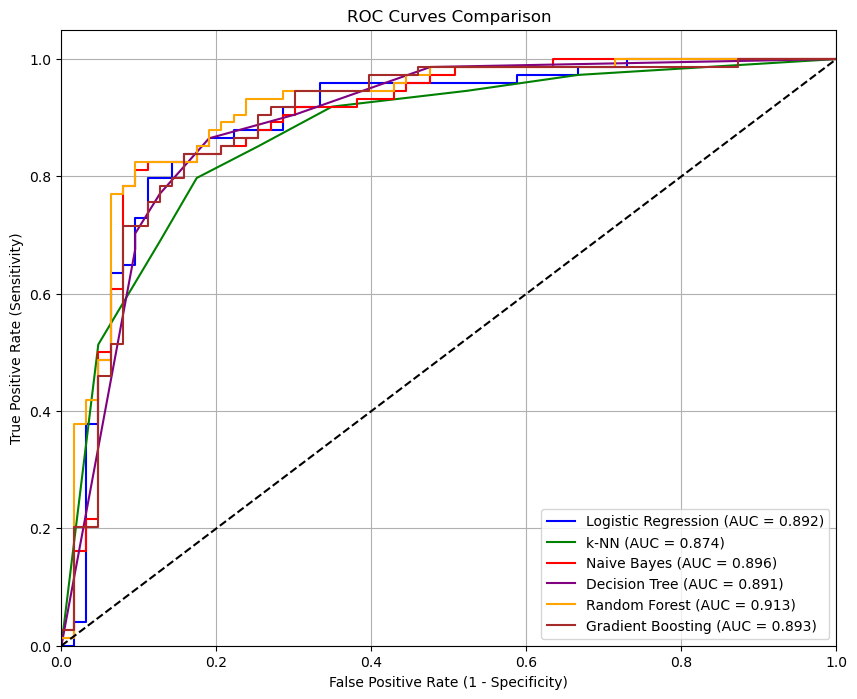


AUC Scores:
Logistic Regression: 0.892
k-NN: 0.874
Naive Bayes: 0.896
Decision Tree: 0.891
Random Forest: 0.913
Gradient Boosting: 0.893


In [26]:
# Part 6 : ROC Curve

from sklearn.metrics import roc_curve, auc

# Create ROC curves
plt.figure(figsize=(10, 8))

# Colors for each model
colors = {
    'Logistic Regression': 'blue',
    'k-NN': 'green',
    'Naive Bayes': 'red',
    'Decision Tree': 'purple',
    'Random Forest': 'orange',
    'Gradient Boosting': 'brown'
}

# Plot ROC curve for each model
for model_name, model in best_models.items():
    # Skip SVM models
    if 'SVM' in model_name:
        continue
        
    # Get probabilities for positive class
    try:
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        
        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, color=colors[model_name],
                label=f'{model_name} (AUC = {roc_auc:.3f})')
    except:
        print(f"Could not generate ROC curve for {model_name}")

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()

# Print AUC scores separately
print("\nAUC Scores:")
for model_name, model in best_models.items():
    if 'SVM' in model_name:
        continue
    try:
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"{model_name}: {roc_auc:.3f}")
    except:
        print(f"Could not calculate AUC for {model_name}")

In [ ]:
# ALL classifiers are better than random one
# AUC scores range from 0.874 to 0.913, showing for all strong predictive performance, so very similar
# Random Forest would be the best choice if we need to optimize overall performance
# Most models perform very similarly in the high-specificity region (low false positive rate) - Random Forest has slightly steaper slope

In [ ]:
# Part 7
"""
If our aim here is to identify everyone with even a slight possibility of having a heart attack, it means we have high cost
associated with False Negatives (model predicted as no heart failure, but person actually had it).
In such case Recall is the most suitable performance indicator, =>TP/(TP+FN)
Other indicators dont penalize FN as much as Recall, Specifically
Accuracy is just about true positives and true negatives,
Precision focuses on minimizing FP, 
F1 Score: Balances precision and recall, but we want to prioritize recall here. 
Lastly ROC/AUC shows overall performance measure but doesn't emphasize minimizing fatal misses
"""


In [ ]:
# Part 8
""" From previous outputs
Sensitivity (Recall)  
0  Logistic Regression     0.878    
1                 k-NN     0.851
2           Linear SVM     0.878
3           Kernel SVM     0.892 
4          Naive Bayes     0.878
5        Decision Tree     0.865
6        Random Forest     0.932
7    Gradient Boosting     0.892
Based on Recall, Random Forest should be our chosen model for this specific medical 
context where missing a potential heart disease case could be fatal. """


In [27]:
# Part 9

# Prepare test data
X_test = test_scaled.drop('HeartDisease', axis=1)
y_test = test_scaled['HeartDisease']

# Get predictions from our best model (Random Forest)
best_model = best_models['Random Forest']
y_pred_test = best_model.predict(X_test)

# Calculate sensitivity/recall on test set
from sklearn.metrics import recall_score
test_sensitivity = recall_score(y_test, y_pred_test)

print("\nFinal Model Performance (Random Forest)")
print("-" * 40)
print(f"Sensitivity on Test Set: {test_sensitivity:.3f}")

# Optional: Calculate confusion matrix to see the details
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("\nConfusion Matrix Details:")
print(f"True Positives: {tp}")
print(f"False Negatives: {fn}")
print(f"Total Actual Positive Cases: {tp + fn}")



Final Model Performance (Random Forest)
----------------------------------------
Sensitivity on Test Set: 0.941

Confusion Matrix Details:
True Positives: 64
False Negatives: 4
Total Actual Positive Cases: 68


In [ ]:
# Based on our test data our Random Forest model with 'n_estimators': 100, 'max_depth': 3 predicts only 4 False Negatives. (94%)
# this is very close to our Train Recall results

## Problem 2: Decision Tree (20 pts)

1) Take the decision tree (single tree) model you trained in the previous problem and plot the tree itself.
2) Create the feature importance plot.
3) Take the most important two features (call them X[0] and X[1]) by looking at the feature importance plot and make a 2D decision boundary plot similar to the one below. (Note: the plot below belongs to a different dataset; it's shown here just as an example.)

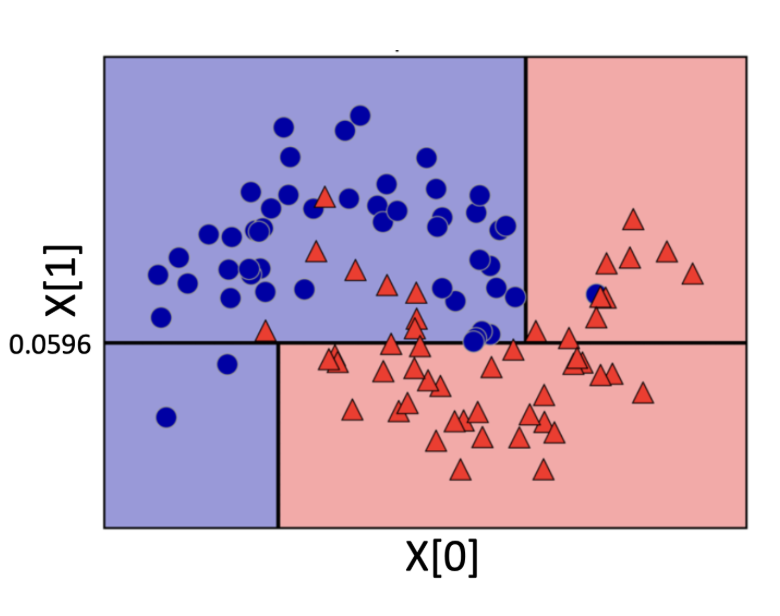

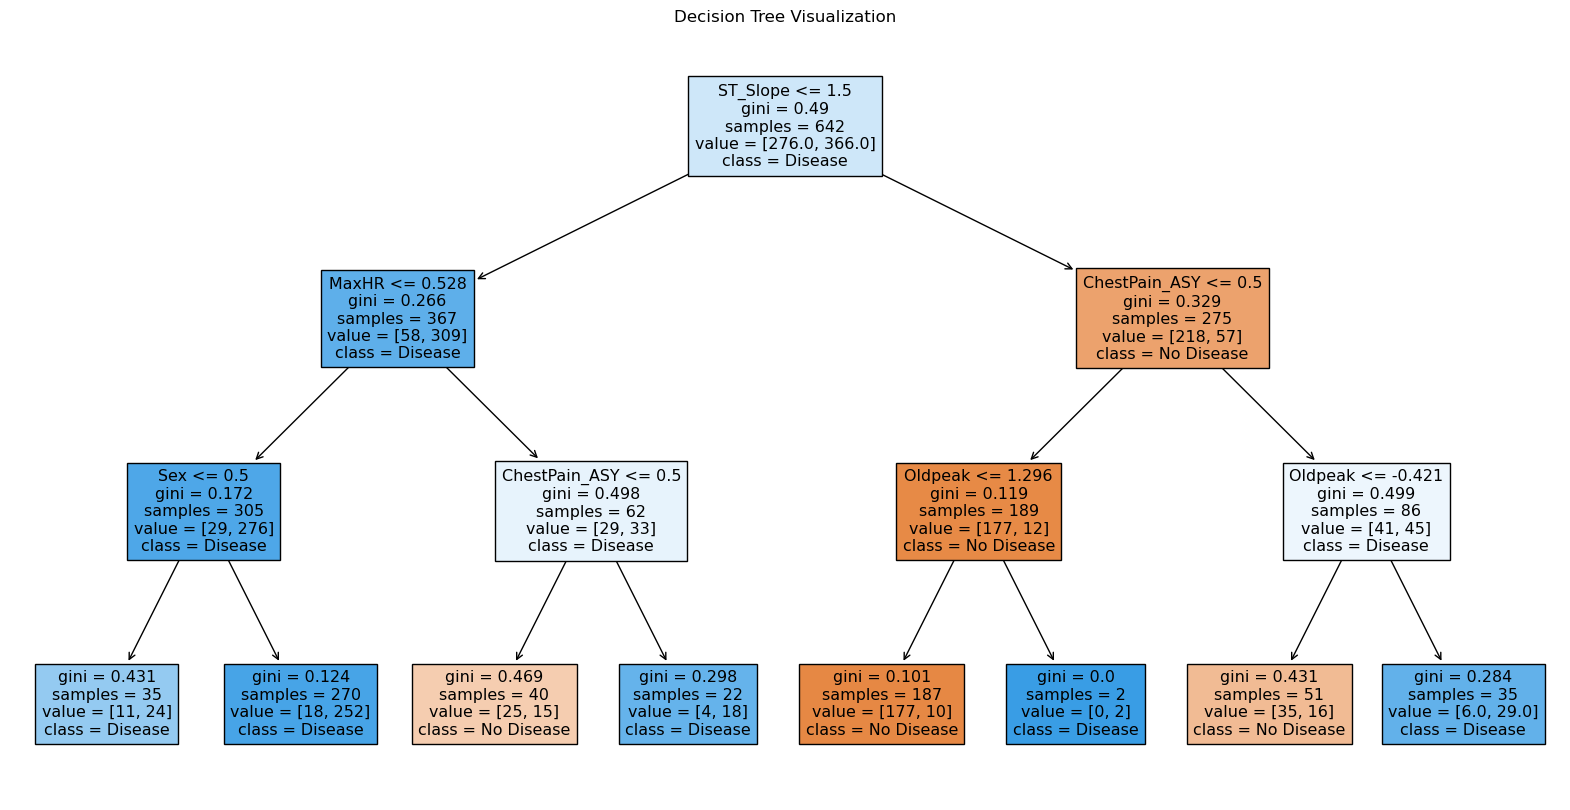

In [28]:
from sklearn.tree import plot_tree

# 1. Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_models['Decision Tree'], feature_names=X_train.columns, 
          class_names=['No Disease', 'Disease'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

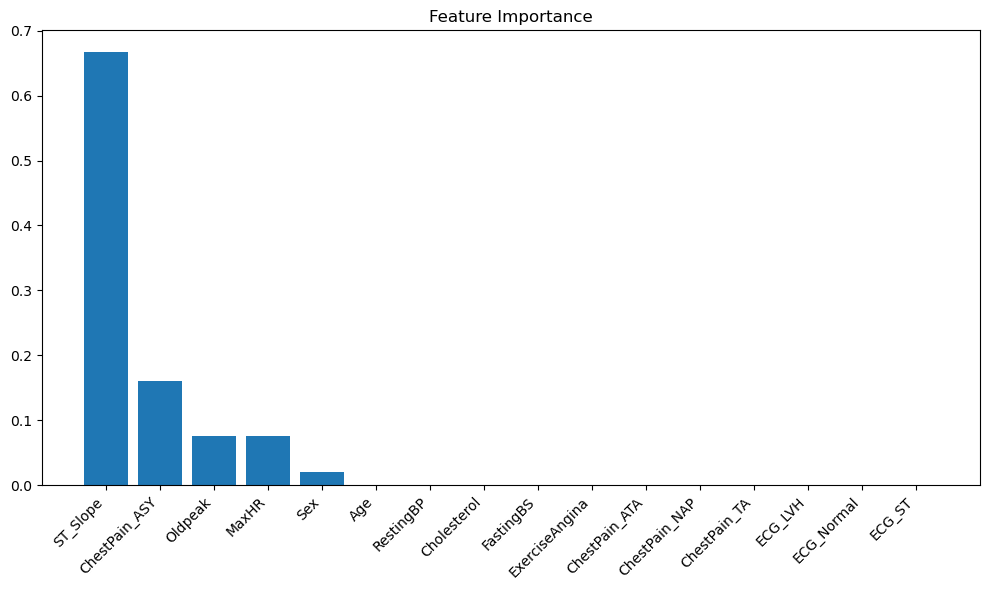


Top 2 features: ['ST_Slope', 'ChestPain_ASY']


In [31]:
# 2. Feature Importance Plot
importances = best_models['Decision Tree'].feature_importances_
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Get top 2 features
top_2_features = feature_importance['feature'].head(2).tolist()
print(f"\nTop 2 features: {top_2_features}")

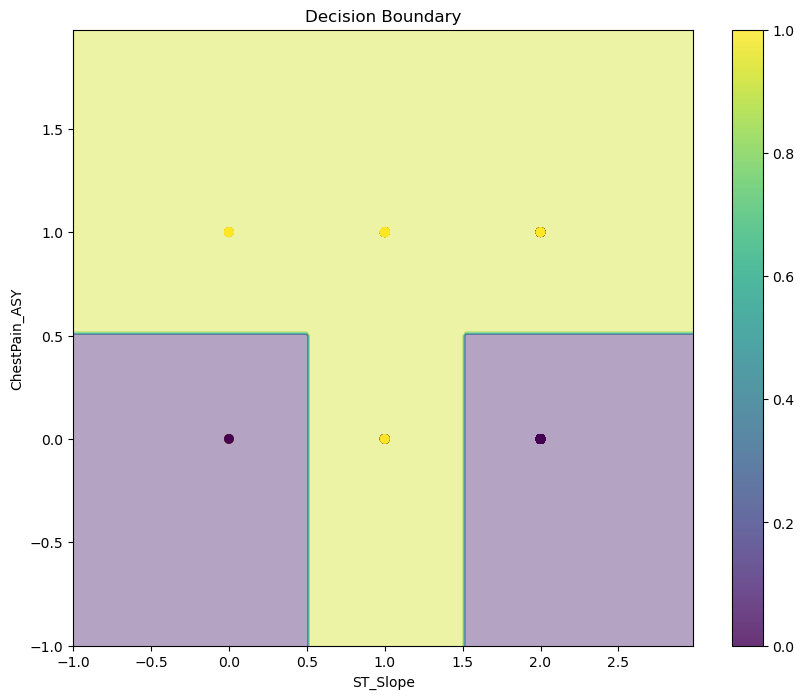

In [30]:
# 3. Decision Boundary Plot
def plot_decision_boundary(X, y, model, feature_names):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Decision Boundary')
    plt.colorbar(scatter)
    plt.show()

# Prepare data for decision boundary plot
X_top2 = X_train[top_2_features].values
y_top2 = y_train.values

# Create and fit a new decision tree with only top 2 features
from sklearn.tree import DecisionTreeClassifier
tree_top2 = DecisionTreeClassifier(max_depth=5)
tree_top2.fit(X_top2, y_top2)

# Plot decision boundary
plot_decision_boundary(X_top2, y_top2, tree_top2, top_2_features)

## Problem 3: Decision boundary in logistic regression (10 pts)

Let's say you trained a logistic regression model on a dataset (not the heart disease dataset; this problem is independent of the ones above). The parameters turn out to be $\beta_0 = 2$, $\beta_1 = -3$ and $\beta_2 = 7$. Use algebra (no coding) to find the equation of the line that defines the decision boundary.

In [ ]:
"""
 P(y=1) = 0.5 is our decision boundary for logistic regression (by definition)
 Our function is β0 +β1x1 +β2x2 = 0
 If we put given values into our function, it makes => 2 -3x1 + 7X2 = 0
 If we solve this for x2 = (3X1-2)/7 => put x1 = 0, so intercept at x2 axis is -2/7, put x2=0, intercept at x1 is 2/3.
 So decision boundry will be a line passing through (0,-2/7) and (2/3, 0)
 